In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [156]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [157]:
#Gender
df['Gender'].value_counts()
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True);
df['Gender'].value_counts()

/tmp/ipython-input-157-342670961.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'Male':0,'Female':1}},inplace=True);


,count
Gender,
0.0,489
1.0,112


In [158]:
#Married
df['Married'].value_counts()
df.replace({'Married':{'Yes':1,'No':0}},inplace=True);
df['Married'].value_counts()

/tmp/ipython-input-158-3398249599.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Married':{'Yes':1,'No':0}},inplace=True);


,count
Married,
1.0,398
0.0,213


In [159]:
#Education
df['Education'].value_counts()
df.replace({'Education':{'Graduate':1,'Not Graduate':0}},inplace=True);
df['Education'].value_counts()

/tmp/ipython-input-159-2699820703.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Education':{'Graduate':1,'Not Graduate':0}},inplace=True);


,count
Education,
1,480
0,134


In [160]:
#Self_Employed
df['Self_Employed'].value_counts()
df.replace({'Self_Employed':{'Yes':1,'No':0}},inplace=True);
df['Self_Employed'].value_counts()

/tmp/ipython-input-160-125620382.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Self_Employed':{'Yes':1,'No':0}},inplace=True);


,count
Self_Employed,
0.0,500
1.0,82


In [161]:
#Property_Area
df['Property_Area'].value_counts()
df.replace({'Property_Area':{'Urban':2,'Semiurban':1,'Rural':0}},inplace=True);
df['Property_Area'].value_counts()

/tmp/ipython-input-161-3466619887.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Property_Area':{'Urban':2,'Semiurban':1,'Rural':0}},inplace=True);


,count
Property_Area,
1,233
2,202
0,179


In [162]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,0.0,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,0.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,2,Y
612,LP002984,0.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,2,Y


In [163]:
#Checking for Null Values
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [164]:
df.dropna(inplace=True)
df['Dependents'].value_counts()
df.replace({'Dependents':{0:0,1:1,2:2,'3+':3}},inplace=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,0.0,1.0,2,1,1.0,5417,4196.0,267.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,0.0,1.0,3,1,0.0,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,0.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,2,Y
612,LP002984,0.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,2,Y


In [165]:
df.replace({'Loan_Status' : {'Y':1,'N':0}},inplace=True)
df

/tmp/ipython-input-165-1751285818.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Loan_Status' : {'Y':1,'N':0}},inplace=True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,0.0,1.0,2,1,1.0,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,0.0,1.0,3,1,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,0.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,0.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,2,1


In [166]:
print(df.columns)
print(df.describe())

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
           Gender     Married   Education  Self_Employed  ApplicantIncome  \
count  480.000000  480.000000  480.000000     480.000000       480.000000   
mean     0.179167    0.647917    0.797917       0.137500      5364.231250   
std      0.383892    0.478118    0.401973       0.344734      5668.251251   
min      0.000000    0.000000    0.000000       0.000000       150.000000   
25%      0.000000    0.000000    1.000000       0.000000      2898.750000   
50%      0.000000    1.000000    1.000000       0.000000      3859.000000   
75%      0.000000    1.000000    1.000000       0.000000      5852.500000   
max      1.000000    1.000000    1.000000       1.000000     81000.000000   

       CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit

In [167]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(columns=['Loan_Status','Loan_ID'],axis=1),df['Loan_Status'],test_size=0.2,random_state=2,stratify=df['Loan_Status'])

In [168]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [180]:
model2 = svm.SVC()
model2.fit(X_train,Y_train)
X_train_prediction2 = model2.predict(X_train)
training_data_accuracy2 = accuracy_score(X_train_prediction2,Y_train)
print("Accuracy on training data : ",training_data_accuracy2)
X_test_prediction2 = model2.predict(X_test)
test_data_accuracy2 = accuracy_score(X_test_prediction2,Y_test)
print("Accuracy on test data : ",test_data_accuracy2)

Accuracy on training data :  0.828125
Accuracy on test data :  0.8229166666666666


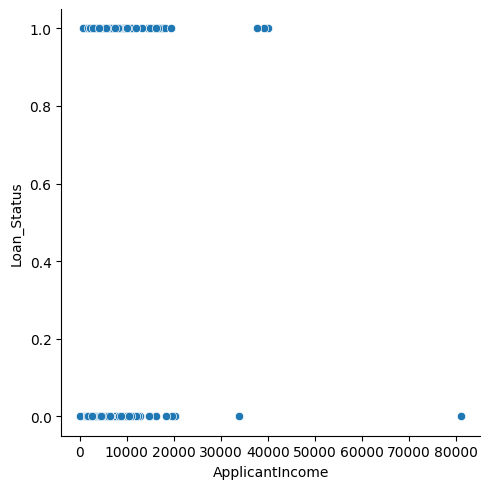

In [170]:
sns.relplot(x="ApplicantIncome",y="Loan_Status",data=df)

In [171]:
df.drop('Loan_ID',axis=1,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
5,0.0,1.0,2,1,1.0,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,0.0,1.0,3,1,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,0.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,0.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,2,1


[]

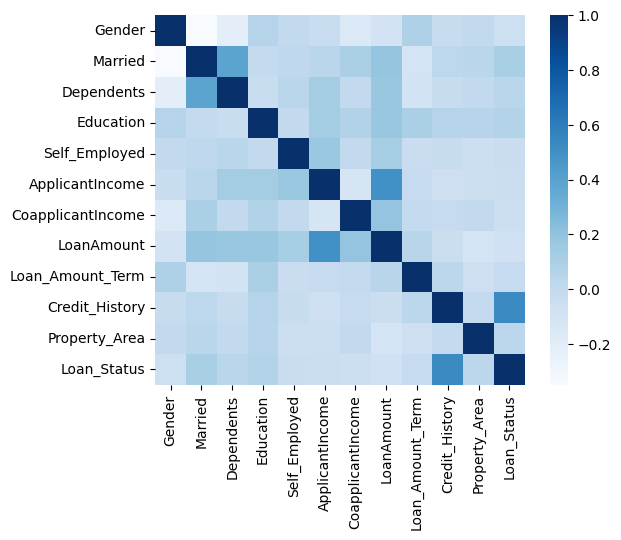

In [172]:
sns.heatmap(df.corr(),cmap='Blues',square=True)
plt.plot()

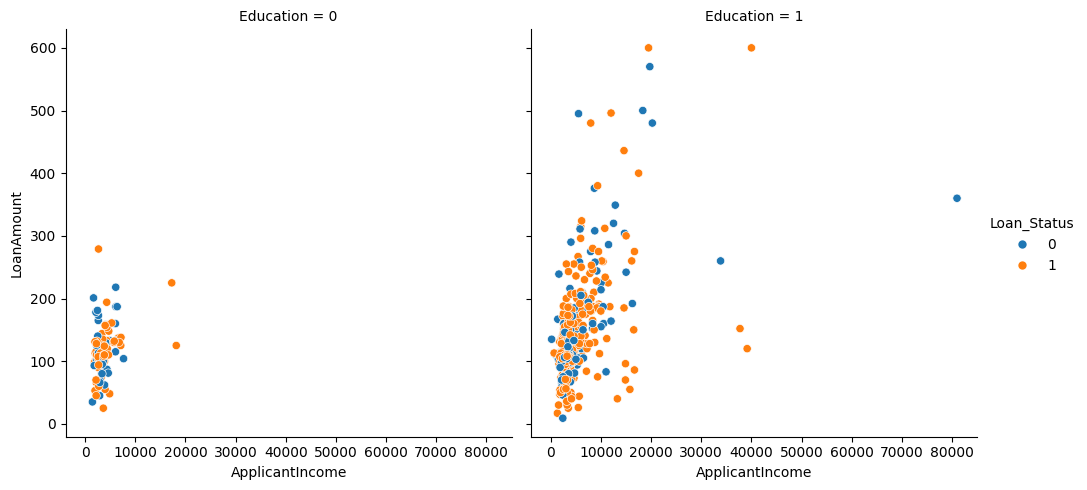

In [179]:
sns.relplot(x="ApplicantIncome",y="LoanAmount",hue="Loan_Status",col="Education",data=df)